<h1 style="text-align: center;">Sales Analysis</h1>

In [108]:
# Import Librarires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [107]:
# Import dataset

df = pd.read_csv(r'C:\Users\Dayanand Sagar\Desktop\Project\Superstore.csv', encoding='latin1')

df.head(3)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [106]:
# Checking the size of data

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int32         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [105]:
# Checking for null values

df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Quarter          0
month            0
dtype: int64

In [104]:
# Changing the data type from float to integer

df['Postal Code']=df['Postal Code'].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int32         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [103]:
# General Overview of Data

df.describe().drop('Postal Code',axis=1)


,Row ID,Sales,Quantity,Discount,Profit,Year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896,2015.722233
std,2885.163629,623.245101,2.225110,0.206452,234.260108,1.123555
min,1.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750,2015.000000
50%,4997.500000,54.490000,3.000000,0.200000,8.666500,2016.000000
75%,7495.750000,209.940000,5.000000,0.200000,29.364000,2017.000000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000


In [102]:
# Checking for duplicates

if df.duplicated().sum() > 0:
    print('Duplicates are present')
else:
    print('No duplicates exist')
    

No duplicates exist


## Exploratory Data Analysis

### Customer Analysis

In [41]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [134]:
# Find the types of Customers

types_of_customers = df['Segment'].unique()

# Convert to a DataFrame for a tabular view

types_of_customers = pd.DataFrame(types_of_customers, columns=['Customer Type'])
print(types_of_customers)


  Customer Type
0      Consumer
1     Corporate
2   Home Office


In [101]:
# Total Number of customers

customers = df['Row ID'].count()
print('Total no of customers:', customers)


Total no of customers: 9994


In [100]:
# Number of customers in each segment

no_of_customers = df['Segment'].value_counts().reset_index()
no_of_customers = no_of_customers.rename(columns={'index':'Customer Type','Segment':'Total Customers'})

print(no_of_customers)


  Customer Type  Total Customers
0      Consumer             5191
1     Corporate             3020
2   Home Office             1783


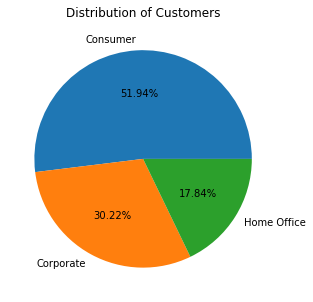

In [99]:
# Pie Chart for number of customers in each segment

plt.figure(figsize=(10,5))
plt.pie(no_of_customers['Total Customers'],labels=no_of_customers['Customer Type'],autopct='%0.2f%%');
plt.title('Distribution of Customers')
plt.show()


## Customers and sales

In [98]:
# Total Sales based on segment

sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()

# Rename the column for better result

sales_per_segment = sales_per_segment.rename(columns={'Segment':'Customer Type','Sales':'Total Sales'})
print(sales_per_segment)


  Customer Type   Total Sales
0      Consumer  1.161401e+06
1     Corporate  7.061464e+05
2   Home Office  4.296531e+05


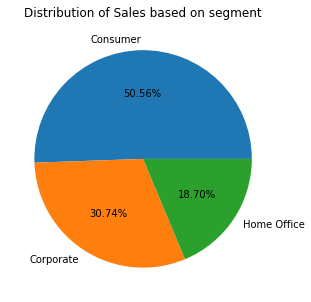

In [110]:
# Plotting a pie chart for customers and sales by segment

plt.figure(figsize=(10,5))
plt.pie(sales_per_category['Total Sales'],labels=no_of_customers['Customer Type'],autopct='%0.2f%%');
plt.title('Distribution of Sales based on segment')
plt.show()


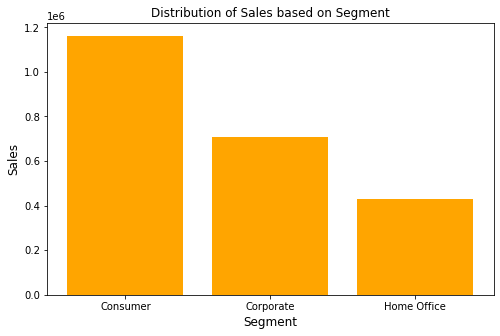

In [109]:
# Bar graph of sales distribution by segment

plt.figure(figsize=(8,5))
plt.bar(sales_per_category['Customer Type'],sales_per_category['Total Sales'],color='orange')
plt.title('Distribution of Sales based on Segment')
plt.xlabel('Segment',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.show()


# Customers Loayalty

In [111]:
# Group data to find the best customers based on their orders

customer_orders = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()

#Rename the column 

customer_orders = customer_orders.rename(columns={'Order ID':'Total Orders'})

#identify repeat customers

repeat_customers = customer_orders[customer_orders['Total Orders'] >= 1]

#Sort the customers in descending order

sort_customers = repeat_customers.sort_values(by='Total Orders',ascending=False)

# Top 10 Customers

top_customers = sort_customers.head(10).reset_index(drop=True)
print(top_customers)


  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            37
1    PP-18955           Paul Prost  Home Office            34
2    JL-15835             John Lee     Consumer            34
3    MA-17560         Matt Abelman  Home Office            34
4    SV-20365          Seth Vernon     Consumer            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    CK-12205  Chloris Kastensmidt     Consumer            32
7    EH-13765         Edward Hooks    Corporate            32
8    EP-13915           Emily Phan     Consumer            31
9    ZC-21910     Zuschuss Carroll     Consumer            31


In [112]:
# Group data based on Customer ID,Customer Name, and Sales

customer_sales = df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()

#sorting customers to descending

sort_customer_sales = customer_sales.sort_values(by='Sales',ascending=False)

# Top 10 Customers based on sales

ranking_customers = sort_customer_sales.head(10).reset_index(drop=True)
print(ranking_customers)


  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


## Mode of Shiping

In [154]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [135]:
# Find the mode of shiping available

shiping_mode = df['Ship Mode'].unique()

# Convert to a DataFrame for a tabular view

shipping_mode_df = pd.DataFrame(shiping_mode,columns = ['Ship Mode'])
print(shipping_mode_df)


        Ship Mode
0    Second Class
1  Standard Class
2     First Class
3        Same Day


In [24]:
# Frequency use of shipping mode

cust_ship_mode = df['Ship Mode'].value_counts().reset_index()
cust_ship_mode = cust_ship_mode.rename(columns={'index':'Ship Mode','Ship Mode':'Total Customers'})
print(cust_ship_mode)


        Ship Mode  Total Customers
0  Standard Class             5968
1    Second Class             1945
2     First Class             1538
3        Same Day              543


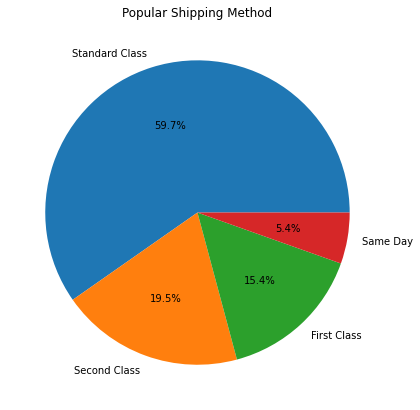

In [26]:
# Number of customers by shipping mode

plt.figure(figsize=(10,7))
plt.pie(cust_ship_mode['Total Customers'],labels=cust_ship_mode['Ship Mode'],autopct='%1.1f%%');
plt.title('Popular Shipping Method')
plt.show()


In [32]:
# Distribution of Sales per Ship Mode

sales_per_shipmode = df.groupby(['Ship Mode'])['Sales'].sum().reset_index()
sales_per_shipmode = sales_per_shipmode.rename(columns={'Sales':'Total Sales'})
print(sales_per_shipmode)


        Ship Mode   Total Sales
0     First Class  3.514284e+05
1        Same Day  1.283631e+05
2    Second Class  4.591936e+05
3  Standard Class  1.358216e+06


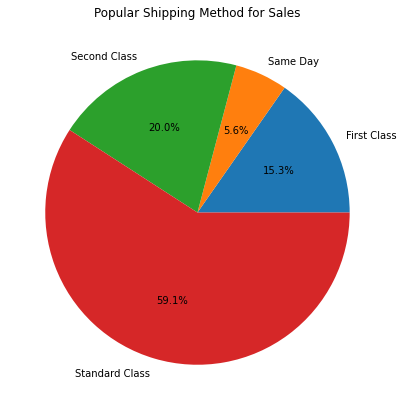

In [34]:
# Distribution of sales based on 

plt.figure(figsize=(10,7))
plt.pie(sales_per_shipmode['Total Sales'],labels=sales_per_shipmode['Ship Mode'],autopct='%1.1f%%');
plt.title('Popular Shipping Method for Sales')
plt.show()


## Geographical Analysis

In [35]:
# Number of Customers in each state

state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index':'State','State':'Total Customers'})
print(state.head(10))


            State  Total Customers
0      California             2001
1        New York             1128
2           Texas              985
3    Pennsylvania              587
4      Washington              506
5        Illinois              492
6            Ohio              469
7         Florida              383
8        Michigan              255
9  North Carolina              249


In [43]:
# Distribution of sales based o state

state_sales = df.groupby('State')['Sales'].sum().reset_index()
state_sales = state_sales.sort_values(by='Sales',ascending=False)

# Top 10 states per sales

print(state_sales.head(10).reset_index(drop=True))


          State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140
5       Florida   89473.7080
6      Illinois   80166.1010
7          Ohio   78258.1360
8      Michigan   76269.6140
9      Virginia   70636.7200


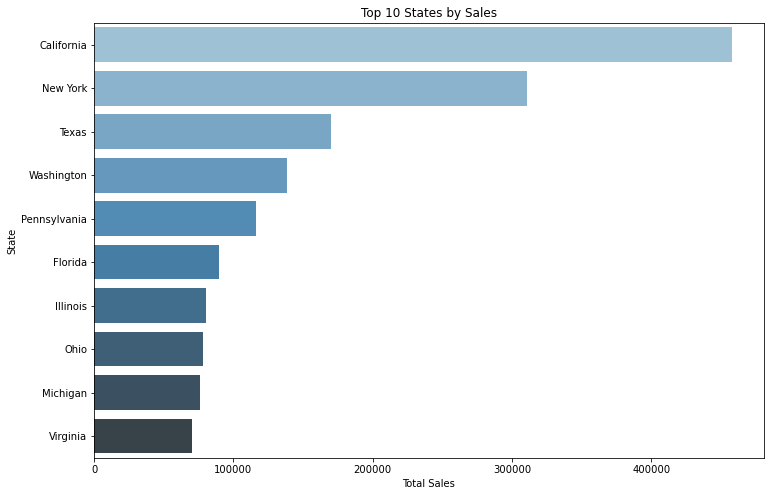

In [42]:
# Calculate total sales per state
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort states by total sales in descending order
state_sales = state_sales.sort_values(by='Sales', ascending=False)

# Display top 10 states by sales
top_10_states = state_sales.head(10).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='State', data=top_10_states, palette='Blues_d')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.title('Top 10 States by Sales')
plt.show()


In [44]:
# Number of Customers by city

city = df['City'].value_counts().reset_index()
city = city.rename(columns={'index':'City','City':'Total Customers'})
print(city.head(10))


            City  Total Customers
0  New York City              915
1    Los Angeles              747
2   Philadelphia              537
3  San Francisco              510
4        Seattle              428
5        Houston              377
6        Chicago              314
7       Columbus              222
8      San Diego              170
9    Springfield              163


In [50]:
# Distribution of sales by city

city_sales = df.groupby('City')['Sales'].sum().reset_index()
city_sales = city_sales.sort_values(by='Sales',ascending=False)

# Top 10 cities by sales

print(city_sales.head(10).reset_index(drop=True))


            City        Sales
0  New York City  256368.1610
1    Los Angeles  175851.3410
2        Seattle  119540.7420
3  San Francisco  112669.0920
4   Philadelphia  109077.0130
5        Houston   64504.7604
6        Chicago   48539.5410
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9    Springfield   43054.3420


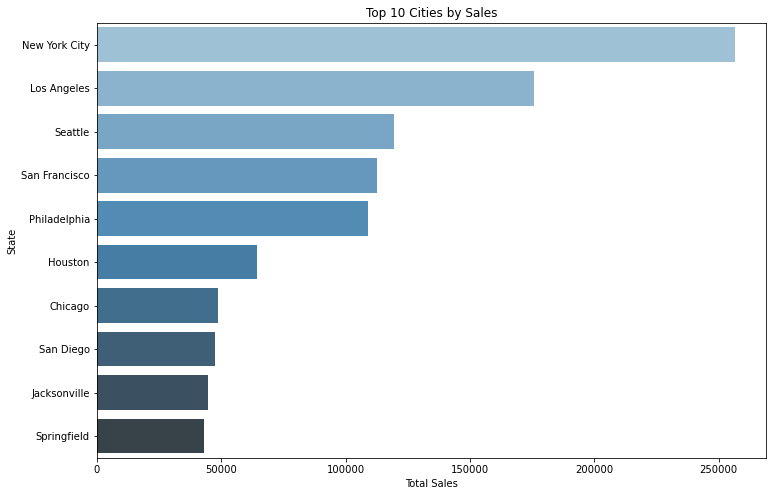

In [53]:
# Display top 10 Cities by sales

top_10_cities = city_sales.head(10).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='City', data=top_10_cities, palette='Blues_d')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.title('Top 10 Cities by Sales')
plt.show()


## Product Analysis

In [160]:
# Find the categories

category = df['Category'].unique()

category_df = pd.DataFrame(category,columns=(['Category']))
print(category_df)


          Category
0        Furniture
1  Office Supplies
2       Technology


In [139]:
# Find the products

sub_category = df['Sub-Category'].unique()

# Convert to a DataFrame for a tabular view

product_lists = pd.DataFrame(sub_category, columns=['Sub-Category'])
print(product_lists)


   Sub-Category
0     Bookcases
1        Chairs
2        Labels
3        Tables
4       Storage
5   Furnishings
6           Art
7        Phones
8       Binders
9    Appliances
10        Paper
11  Accessories
12    Envelopes
13    Fasteners
14     Supplies
15     Machines
16      Copiers


In [141]:
# Find how many sub-categories are their in each category

product_category = df.groupby('Category')['Sub-Category'].nunique().reset_index()
product_category = product_category.rename(columns={'Sub-Category':'Sub-Categories'})
print(product_category)


          Category  Sub-Categories
0        Furniture               4
1  Office Supplies               9
2       Technology               4


In [142]:
# Distribution Sales by category

category_sales = df.groupby('Category')['Sales'].sum().reset_index()
print(category_sales.sort_values(by='Sales',ascending=False).reset_index(drop=True))


          Category        Sales
0       Technology  836154.0330
1        Furniture  741999.7953
2  Office Supplies  719047.0320


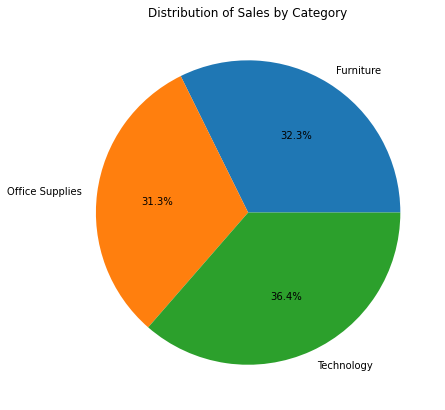

In [143]:
# Plotting Graph for Distribution of Sales by Category

plt.figure(figsize=(10,7))
plt.pie(category_sales['Sales'],labels=category_sales['Category'],autopct='%1.1f%%');
plt.title('Distribution of Sales by Category')
plt.show()


In [144]:
# Total sales by sub-category

sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()
sub_category_sales = sub_category_sales.sort_values(by='Sales',ascending=False).reset_index(drop=True)
print(sub_category_sales)


   Sub-Category        Sales
0        Phones  330007.0540
1        Chairs  328449.1030
2       Storage  223843.6080
3        Tables  206965.5320
4       Binders  203412.7330
5      Machines  189238.6310
6   Accessories  167380.3180
7       Copiers  149528.0300
8     Bookcases  114879.9963
9    Appliances  107532.1610
10  Furnishings   91705.1640
11        Paper   78479.2060
12     Supplies   46673.5380
13          Art   27118.7920
14    Envelopes   16476.4020
15       Labels   12486.3120
16    Fasteners    3024.2800


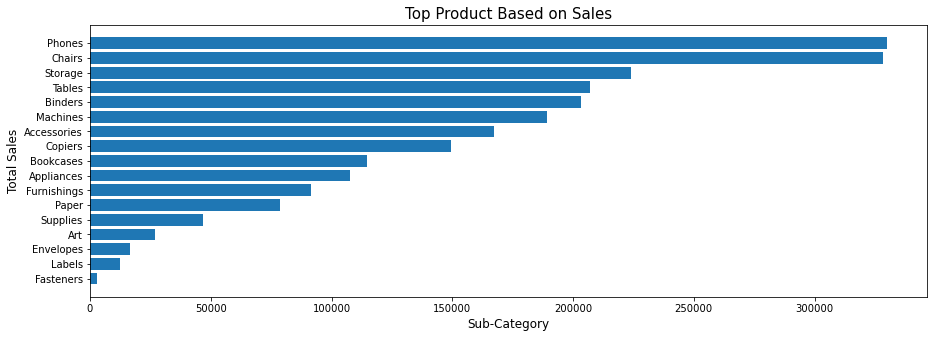

In [132]:
# Bar chart of sales by sub-category

sub_category_sales = sub_category_sales.sort_values(by='Sales',ascending=True)
plt.figure(figsize=(15,5))
plt.barh(sub_category_sales['Sub-Category'],sub_category_sales['Sales'])

plt.xlabel('Sub-Category',fontsize=12)
plt.ylabel('Total Sales',fontsize=12)
plt.title('Top Product Based on Sales',fontsize=15)
plt.show()


## Sales Trend Analysis

In [78]:
#Convert order date to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)

# Group by year and calculate total sales
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()

# Rename columns for clarity
yearly_sales = yearly_sales.rename(columns={'Order Date':'Year','Sales':'Total Sales'})

# Print the result
print(yearly_sales)


   Year  Total Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552


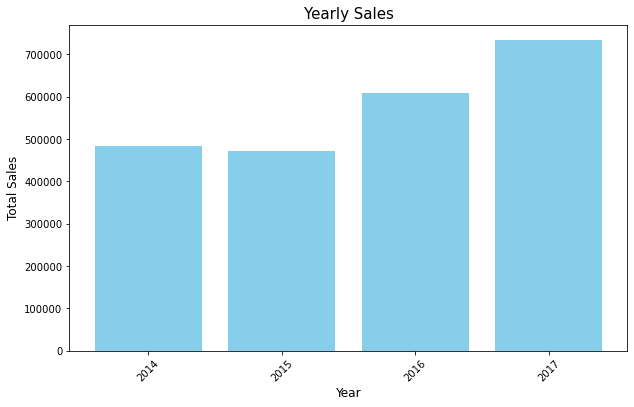

In [79]:
# Sales distribution by years

year_labels = [str(year) for year in yearly_sales['Year']]

plt.figure(figsize=(10, 6))
plt.bar(year_labels, yearly_sales['Total Sales'], color='skyblue')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Yearly Sales', fontsize=15)
plt.xticks(rotation=45)
plt.show()


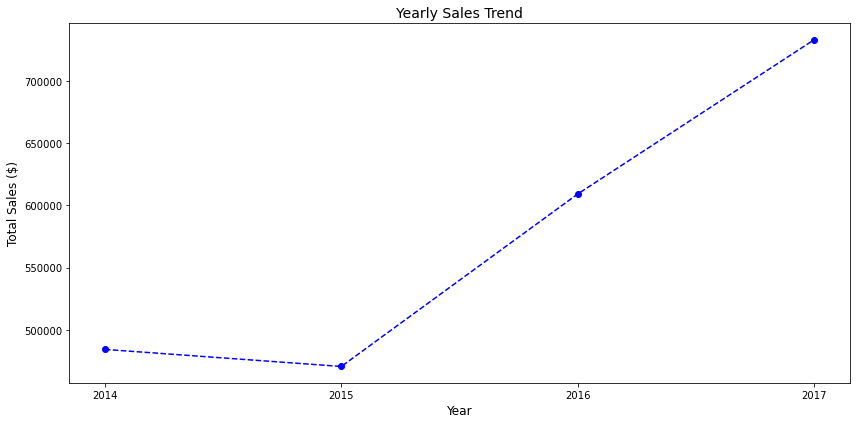

In [80]:
#Graph of yearly Sales Trend

plt.figure(figsize=(12, 6))
plt.plot(year_labels, yearly_sales['Total Sales'], marker='o', linestyle='--', color='blue')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Yearly Sales Trend', fontsize=14)

plt.xticks(year_labels)
plt.tight_layout()
plt.show()


In [151]:
# Quarterly Sales Trend

df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.to_period('Q')

quarterly_sales = df.groupby(['Quarter'])['Sales'].sum().reset_index()
print(quarterly_sales)


   Quarter        Sales
0   2014Q1   96498.7200
1   2014Q2   83636.8806
2   2014Q3  139306.0173
3   2014Q4  164805.8802
4   2015Q1   90952.3496
5   2015Q2   97852.8812
6   2015Q3  145554.2330
7   2015Q4  136173.0452
8   2016Q1  136898.6390
9   2016Q2  149148.5428
10  2016Q3  131098.5257
11  2016Q4  192059.8905
12  2017Q1  189519.8842
13  2017Q2  127696.7735
14  2017Q3  204221.9995
15  2017Q4  211776.5980


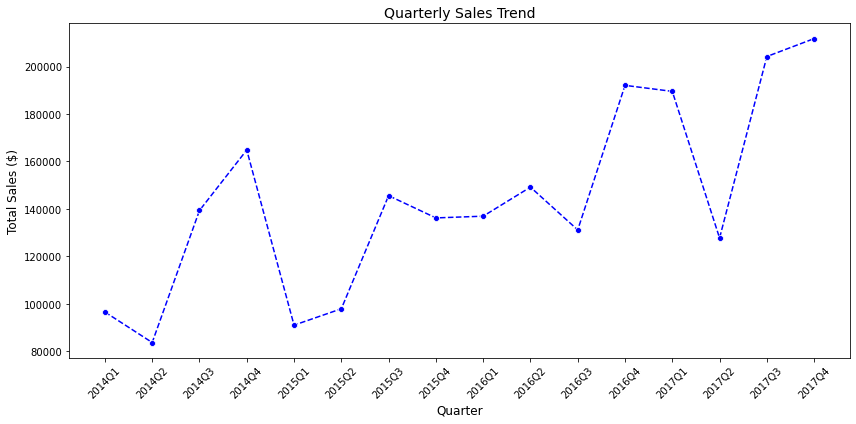

In [152]:
# Graph for Quarterly sales Trend


# Convert 'Quarter' to a string for better plotting
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_sales, x='Quarter', y='Sales', marker='o', linestyle='--', color='blue')

# Add labels and title
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Quarterly Sales Trend', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [153]:
# Quarterly sales for year 2017

year_sales = df[df['Order Date'].dt.year == 2017]

# Resample by quarter and sum sales
quarter_sales_2017 = year_sales.resample('Q', on='Order Date')['Sales'].sum().reset_index()

# Rename columns
quarter_sales_2017.rename(columns={'Order Date': 'Quarter', 'Sales': 'Total Sales'}, inplace=True)
print(quarter_sales_2017)


     Quarter  Total Sales
0 2017-03-31  189519.8842
1 2017-06-30  127696.7735
2 2017-09-30  204221.9995
3 2017-12-31  211776.5980


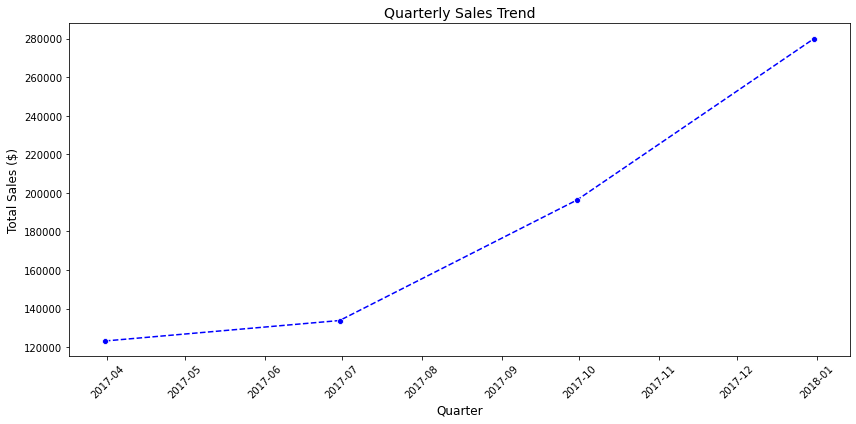

In [85]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=quarter_sales_2017, x='Quarter', y='Total Sales', marker='o', linestyle='--', color='blue')

# Add labels and title

plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Quarterly Sales Trend', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [155]:
#monthly Sales Trend

df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby(['Month'])['Sales'].sum().reset_index()
monthly_sales = monthly_sales.rename(columns={'Sales':'Total Sales'})
print(monthly_sales)


      Month  Total Sales
0   2014-01   28953.7060
1   2014-02   12743.1080
2   2014-03   54801.9060
3   2014-04   24710.0160
4   2014-05   29639.8340
5   2014-06   29287.0306
6   2014-07   35341.2460
7   2014-08   37854.5475
8   2014-09   66110.2238
9   2014-10   34561.9470
10  2014-11   64817.6185
11  2014-12   65426.3147
12  2015-01   29347.3864
13  2015-02   20728.3520
14  2015-03   40876.6112
15  2015-04   38056.9685
16  2015-05   30933.7145
17  2015-06   28862.1982
18  2015-07   28730.3760
19  2015-08   50094.5280
20  2015-09   66729.3290
21  2015-10   32025.0750
22  2015-11   50732.3090
23  2015-12   53415.6612
24  2016-01   38048.1840
25  2016-02   49238.4100
26  2016-03   49612.0450
27  2016-04   45192.2780
28  2016-05   64964.3218
29  2016-06   38991.9430
30  2016-07   42773.3950
31  2016-08   46339.9884
32  2016-09   41985.1423
33  2016-10   52268.1500
34  2016-11   66837.5850
35  2016-12   72954.1555
36  2017-01   64734.3110
37  2017-02   50011.4894
38  2017-03   74774.0838


In [156]:
# Monthly sales for year 2017

monthly_sales = df[df['Order Date'].dt.year == 2017]

# Resample by quarter and sum sales
monthly_sales_2017 = monthly_sales.resample('M', on='Order Date')['Sales'].sum().reset_index()

# Rename columns
monthly_sales_2017.rename(columns={'Order Date': 'Monthly', 'Sales': 'Total Sales'}, inplace=True)
print(monthly_sales_2017)


      Monthly  Total Sales
0  2017-01-31   64734.3110
1  2017-02-28   50011.4894
2  2017-03-31   74774.0838
3  2017-04-30   39072.0016
4  2017-05-31   40882.4464
5  2017-06-30   47742.3255
6  2017-07-31   54382.0875
7  2017-08-31   75675.3040
8  2017-09-30   74164.6080
9  2017-10-31   65501.1622
10 2017-11-30   89306.2400
11 2017-12-31   56969.1958


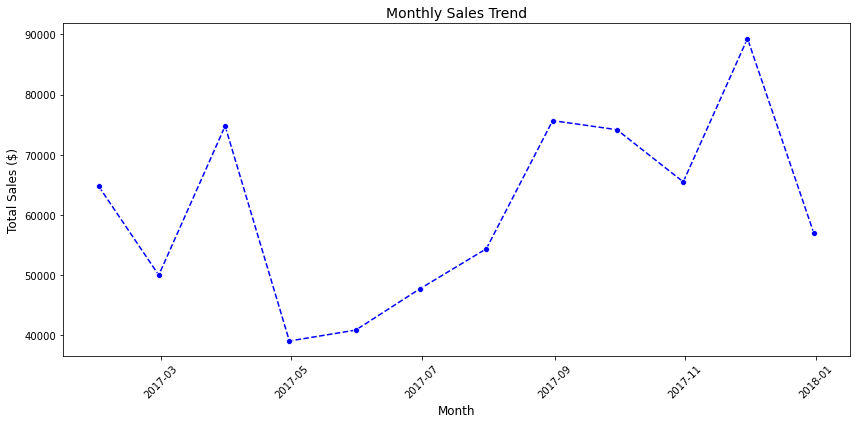

In [157]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_sales_2017, x='Monthly', y='Total Sales', marker='o', linestyle='--', color='blue')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Monthly Sales Trend', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
